In [1]:
!pip install prophet yfinance --quiet

In [2]:
import yfinance as yf
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [3]:
tickers = ['NVDA', 'AAPL', '^GSPC', 'GOOGL', 'BRK-B', 'MSFT']
results = []


📊 Forecasting 1-Year Price for: NVDA
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
17:27:37 - cmdstanpy - INFO - Chain [1] start processing
17:27:38 - cmdstanpy - INFO - Chain [1] done processing


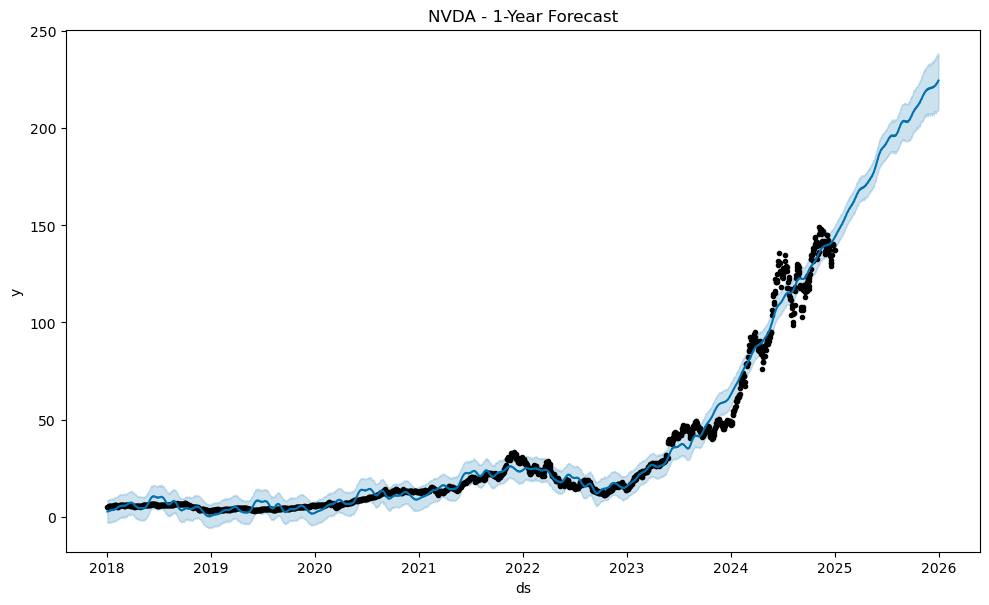


📊 Forecasting 1-Year Price for: AAPL


[*********************100%***********************]  1 of 1 completed
17:27:39 - cmdstanpy - INFO - Chain [1] start processing
17:27:39 - cmdstanpy - INFO - Chain [1] done processing


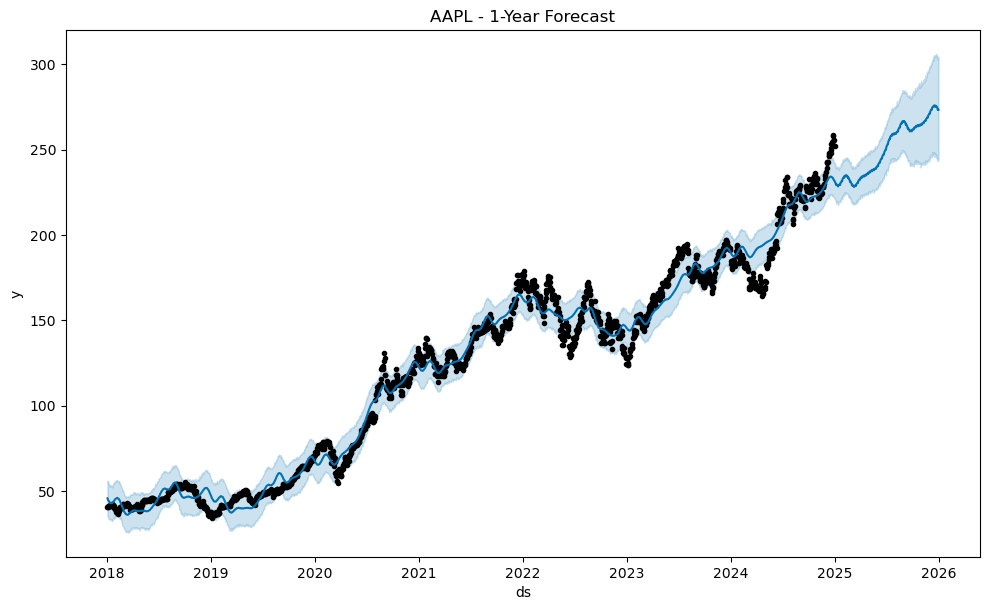


📊 Forecasting 1-Year Price for: ^GSPC


[*********************100%***********************]  1 of 1 completed
17:27:40 - cmdstanpy - INFO - Chain [1] start processing
17:27:41 - cmdstanpy - INFO - Chain [1] done processing


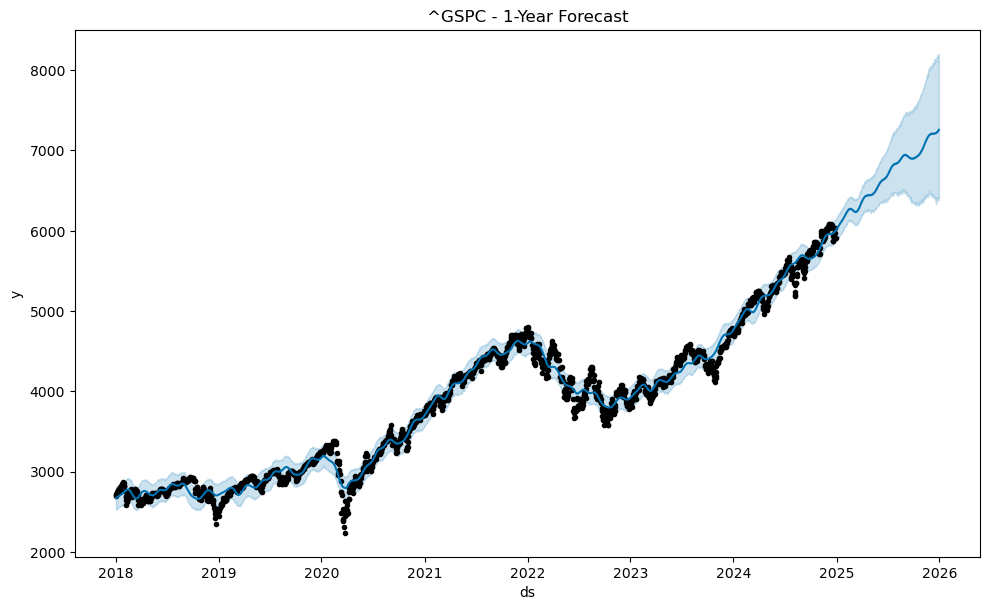


📊 Forecasting 1-Year Price for: GOOGL


[*********************100%***********************]  1 of 1 completed
17:27:42 - cmdstanpy - INFO - Chain [1] start processing
17:27:42 - cmdstanpy - INFO - Chain [1] done processing


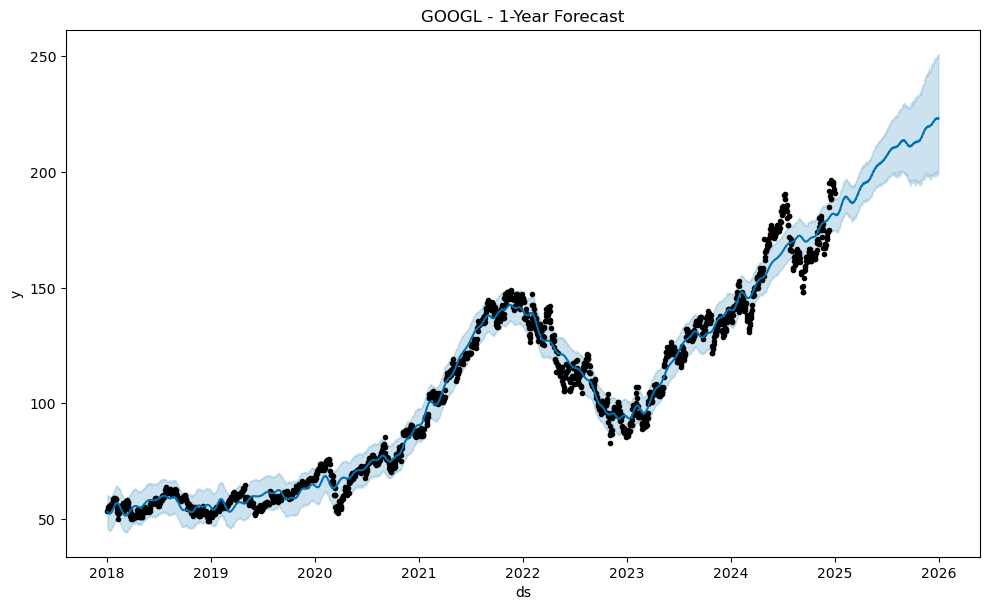

[*********************100%***********************]  1 of 1 completed


📊 Forecasting 1-Year Price for: BRK-B



17:27:43 - cmdstanpy - INFO - Chain [1] start processing
17:27:44 - cmdstanpy - INFO - Chain [1] done processing


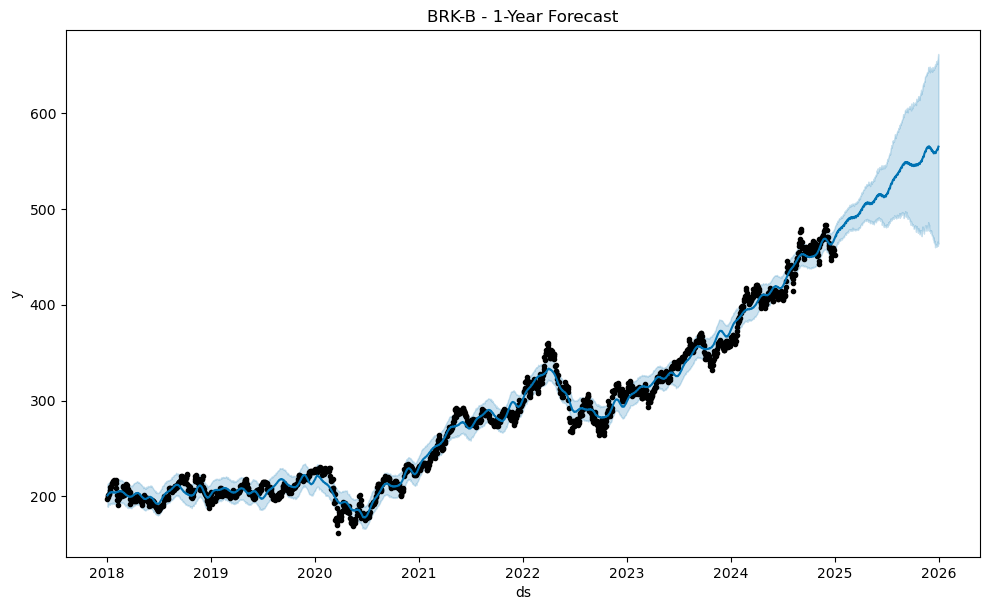


📊 Forecasting 1-Year Price for: MSFT


[*********************100%***********************]  1 of 1 completed
17:27:45 - cmdstanpy - INFO - Chain [1] start processing
17:27:45 - cmdstanpy - INFO - Chain [1] done processing


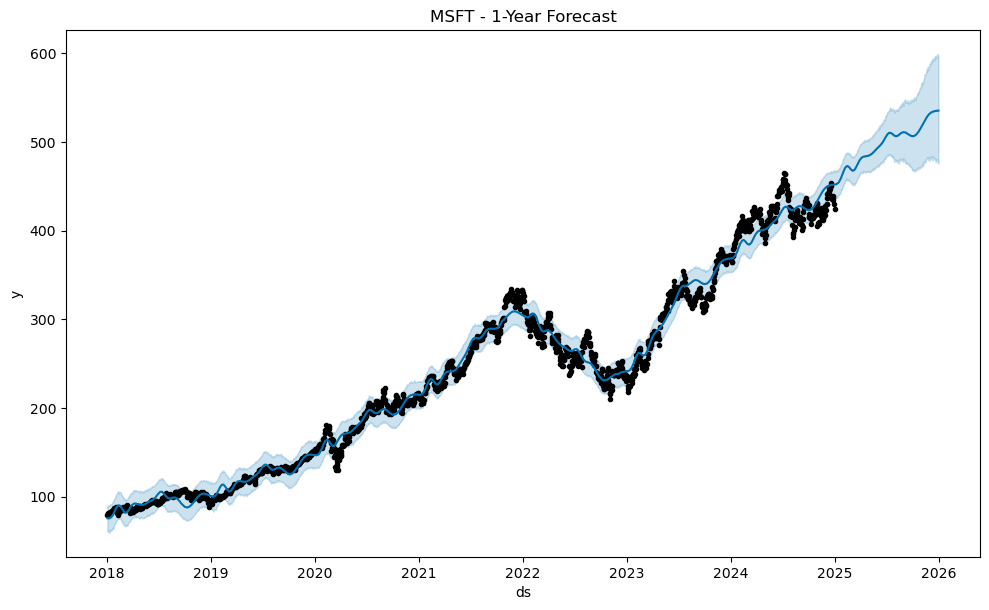

In [4]:
for ticker in tickers:
    print(f"\n📊 Forecasting 1-Year Price for: {ticker}")
    try:
        # Download data
        data = yf.download(ticker, start='2018-01-01', end='2024-12-31')
        df = data[['Close']].reset_index()
        df.columns = ['ds', 'y']

        # Initialize and train Prophet
        model = Prophet(daily_seasonality=True)
        model.fit(df)

        # Forecast 365 days ahead
        future = model.make_future_dataframe(periods=365)
        forecast = model.predict(future)

        # Get last predicted price (1 year ahead)
        current_price = df['y'].iloc[-1]
        predicted_price = forecast['yhat'].iloc[-1]
        growth = (predicted_price - current_price) / current_price * 100

        # Recommendation
        if growth > 10:
            decision = "✅ Strong Buy"
        elif growth > 0:
            decision = "⚠️ Hold"
        else:
            decision = "❌ Avoid"

        # Save to results
        results.append([
            ticker,
            round(current_price, 2),
            round(predicted_price, 2),
            round(growth, 2),
            decision
        ])

        # Plot forecast
        model.plot(forecast)
        plt.title(f"{ticker} - 1-Year Forecast")
        plt.grid()
        plt.show()

    except Exception as e:
        print(f"❌ Error with {ticker}: {e}")

In [5]:
df_results = pd.DataFrame(results, columns=[
    'Ticker', 'Current Price', '1-Year Forecast', 'Growth (%)', 'Recommendation'
])
df_results

,Ticker,Current Price,1-Year Forecast,Growth (%),Recommendation
0,NVDA,137.48,224.35,63.19,✅ Strong Buy
1,AAPL,251.92,273.31,8.49,⚠️ Hold
2,^GSPC,5906.94,7257.22,22.86,✅ Strong Buy
3,GOOGL,191.02,223.22,16.86,✅ Strong Buy
4,BRK-B,452.16,564.72,24.89,✅ Strong Buy
5,MSFT,423.98,535.20,26.23,✅ Strong Buy


In [6]:
df_results.to_csv("1_year_stock_forecast.csv", index=False)